<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

Checking if GPU is available

In [2]:
print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


#Directory locations for the image datasets
In our case these images are stored in google drive.

In [3]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

#Preprocessing steps for the training dataset

In [4]:
train_generator = ImageDataGenerator(
    rescale = 1. / 255,
    zoom_range=0.3,
    vertical_flip=True
)

#Preprocessing steps for the test dataset

In [5]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

#Global parameters

In [6]:
img_dim = 200 # Image dimensions (height and width)
batch_size = 32 # Number of samples per gradient update

#Loading the training dataset into the program

In [7]:
train_ds = train_generator.flow_from_directory(
train_dir,
target_size=(img_dim, img_dim), # Resizing images to the specified dimensions
batch_size=batch_size,
shuffle=True, # Shuffling the dataset
class_mode='binary' # Classification mode: binary (normal vs. pneumonia)
)

Found 5163 images belonging to 2 classes.


#Loading the test dataset into the program

In [8]:
test_ds = test_generator.flow_from_directory(
test_dir,
target_size=(img_dim, img_dim), # Resizing images to the specified dimensions
batch_size=batch_size,
shuffle=True, # Shuffling the dataset
class_mode='binary' # Classification mode: binary (normal vs. pneumonia)
)

Found 613 images belonging to 2 classes.


#Checking the structure/specification of the datasets

In [15]:
x_train, y_train = train_ds.next() # Getting a batch of training samples

print("Training dataset shape:")
print(x_train.shape) # Shape of the input images (batch_size, height, width, channels)
print(y_train.shape) # Shape of the corresponding labels (batch_size,)

Training dataset shape:
(32, 200, 200, 3)
(32,)


#Visualizing some training images

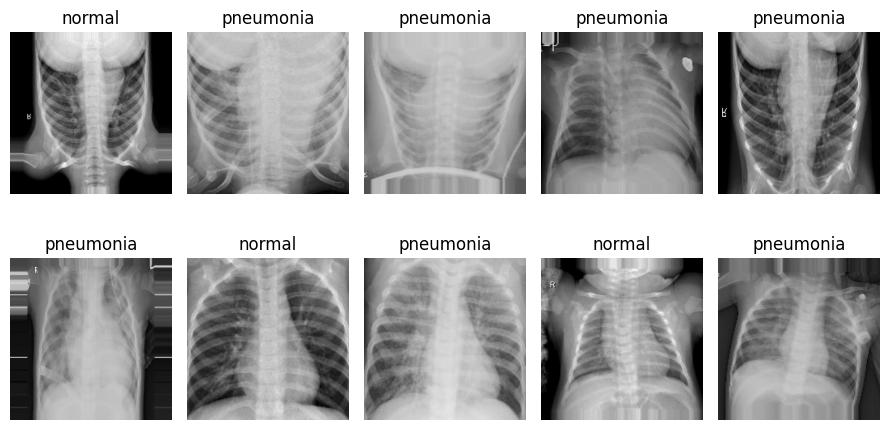

In [16]:
plt.figure(figsize=(9, 5))
for i in range(2 * 5):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i])
  plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()

#Model architecture

In [17]:
model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(img_dim, img_dim, 3)), #input
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
    layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
    layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional layer
    layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
    layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Printing the summary of the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 100, 100, 32)     688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 100, 100, 32)     1344      
 leConv2D)                                                       
                                                        

#Saving the model architecture diagram
In pdf format (optional)

In [19]:
keras.utils.plot_model(model, to_file='/content/drive/MyDrive/out.pdf', show_shapes=True)

#Training the model
Most important steps, would take roughly 45min.

In [20]:
history = model.fit(train_ds, validation_data=test_ds, batch_size=batch_size, epochs=10)

Epoch 1/10
162/162 [==============================] - 1238s 8s/step - loss: 0.3255 - accuracy: 0.8565 - val_loss: 1.4356 - val_accuracy: 0.6183
Epoch 2/10
162/162 [==============================] - 131s 811ms/step - loss: 0.2369 - accuracy: 0.9061 - val_loss: 1.0684 - val_accuracy: 0.6183
Epoch 3/10
162/162 [==============================] - 124s 765ms/step - loss: 0.2241 - accuracy: 0.9113 - val_loss: 0.7486 - val_accuracy: 0.6183
Epoch 4/10
162/162 [==============================] - 124s 767ms/step - loss: 0.2163 - accuracy: 0.9099 - val_loss: 0.5113 - val_accuracy: 0.6444
Epoch 5/10
162/162 [==============================] - 126s 780ms/step - loss: 0.2027 - accuracy: 0.9260 - val_loss: 0.8240 - val_accuracy: 0.5856
Epoch 6/10
162/162 [==============================] - 123s 762ms/step - loss: 0.1825 - accuracy: 0.9283 - val_loss: 1.5615 - val_accuracy: 0.4812
Epoch 7/10
162/162 [==============================] - 125s 769ms/step - loss: 0.1583 - accuracy: 0.9427 - val_loss: 0.6004 - v

#Evaluating the model on the test dataset

In [21]:
model.evaluate(test_ds, batch_size=batch_size)

20/20 [==============================] - 7s 338ms/step - loss: 0.9828 - accuracy: 0.6346


[0.9827862977981567, 0.6345840096473694]

#Visualizing the training and validation performance
plotting neccessary diagrams.

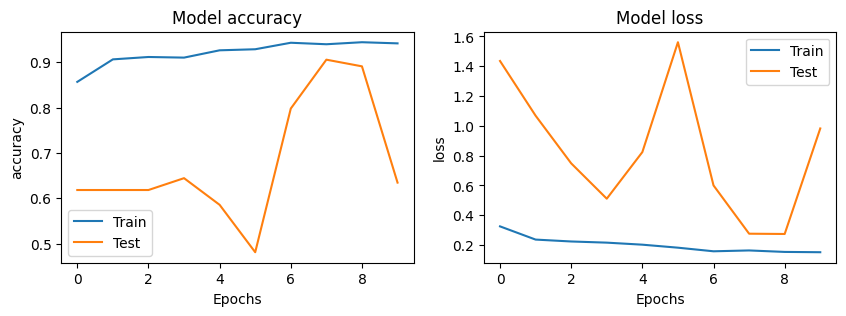

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, metric in enumerate(['accuracy', 'loss']):
  ax[i].plot(history.history[metric])
  ax[i].plot(history.history['val_' + metric])
  ax[i].set_title('Model {}'.format(metric))
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel(metric)
  ax[i].legend(['Train', 'Test'])

#Saving the model in the memory in h5 format

In [23]:
save_location = '/content/drive/MyDrive/my_h5_model.h5'
model.save(save_location)

**Now that we have trained and compiled the model, it is ready for further use. We can reuse this model for making predictions on new data.**